# Wobraz za wotnožki poster za probnu ewaluaciju 2019 

Dźěl postrach dyrbju žiwjeni cykl mróčlow być. Poprawom newěm, štož dyrbju pokazać, ale snano wobraz z slědami žiwjena cykla hrimanja je ideu. 

In [1]:
import numpy as np
import load_satellite_data as lsd

import sys
sys.path.append("/vols/talos/home/stephan/utils/tracking")
import object_tracking as ot

import matplotlib.pyplot as plt
%matplotlib inline

from plotting_tools.colormaps import enhanced_colormap
emap = enhanced_colormap(vmin=210,vmax=300)

import pandas as pd

import scipy.ndimage as ndi
from skimage.morphology import selem, dilation
from scipy.signal import fftconvolve

import haci as hci

/vols/talos/local/anaconda2-5.0.0/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
times = pd.date_range(start="20130618T0900",end="20130618T1500",freq="5min")

In [3]:
times[36]

Timestamp('2013-06-18 12:00:00', freq='5T')

In [4]:
sat_data = np.array([lsd.load_satellite_data(t.to_pydatetime(), 'IR_108',region='de') for t in times])

Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region suggests use of hdf file
Region s

In [5]:
sat_masked = np.array([ot.segment_morphological_reconstruction(sd,'min',-5) for sd in sat_data])

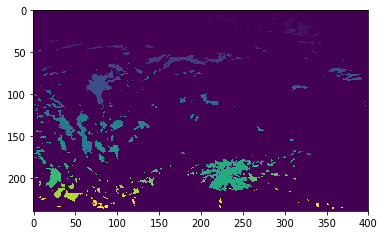

In [6]:
plt.imshow(sat_masked[10])

In [7]:
sat_masked = ~np.ma.masked_less(sat_masked,1).mask

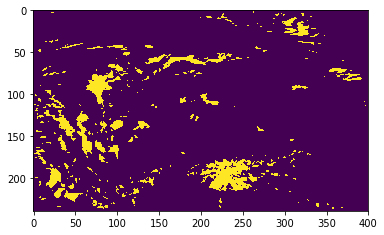

In [8]:
plt.imshow(sat_masked[10])

In [9]:
sel =np.zeros((3,3,3))
sel[1,:,:] = 1
objmap, nr_obj = hci.label_objects(sat_masked,sel)

In [10]:
sel= selem.rectangle(5,3)

In [11]:
buf_mask = np.ones_like(sat_masked,dtype="uint8")

In [12]:
for i in np.arange(np.array(sat_masked.shape[0])):
    buf_mask[i,2:-2,1:-1] = fftconvolve(sat_masked[i,:,:],sel,mode='valid')>0.1

In [13]:
ci_mask = hci.ci_mask(sat_masked,buf_mask)

In [14]:
ci_labels = objmap[ci_mask]

In [15]:
objmap = hci.link_objects(objmap,ci_labels,64)[0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


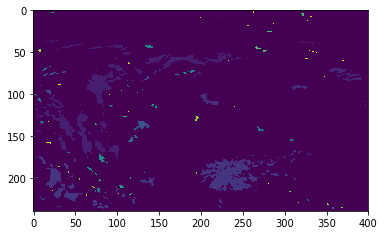

In [16]:
plt.imshow(objmap[10])

In [17]:
objects = ndi.find_objects(objmap)

In [18]:
objprops = hci.object_props(times,objmap,ci_mask)

In [19]:
sufficient_objects = objprops[objprops.t1 - objprops.t0 >= 6]

In [20]:
sufficient_objects

,time,id,flags,t0,t1,l00,l01,c00,c01,l0,l1,c0,c1
2013-06-18-000001,2013-06-18 09:05:00,1,0,1,8,2,6,237,255,1,7,224,255
2013-06-18-000002,2013-06-18 09:05:00,2,0,1,52,2,46,275,398,1,47,275,398
2013-06-18-000005,2013-06-18 09:05:00,5,0,1,9,3,5,100,108,2,6,86,110
2013-06-18-000007,2013-06-18 09:05:00,7,0,1,73,4,49,194,398,4,49,191,398
2013-06-18-000021,2013-06-18 09:05:00,21,0,1,19,33,44,307,347,31,44,295,347
2013-06-18-000026,2013-06-18 09:05:00,26,0,1,7,40,44,236,255,40,44,235,255
2013-06-18-000028,2013-06-18 09:05:00,28,0,1,40,31,55,52,168,30,57,46,168
2013-06-18-000030,2013-06-18 09:05:00,30,0,1,72,7,53,3,185,7,55,3,187
2013-06-18-000033,2013-06-18 09:05:00,33,0,1,73,29,179,1,375,28,183,1,375
2013-06-18-000039,2013-06-18 09:05:00,39,0,1,19,70,83,360,395,62,85,318,395


In [21]:
from skimage import measure

In [22]:
import matplotlib as mpl

In [23]:
cmap = mpl.cm.get_cmap('plasma')
norm = mpl.colors.Normalize(vmin=0, vmax=len(np.unique(sufficient_objects.id.values)))

In [24]:
save_path = "/vols/talos/home/stephan/proj/2019-01_trackingstudie/pics/contours"

In [25]:
plt.switch_backend("Agg")

In [27]:
centroids = {t:{i:[] for i in sufficient_objects.id.values} for t in xrange(len(times))}
contours = {t:{i:[] for i in sufficient_objects.id.values} for t in xrange(len(times))}

In [33]:
for n, tt in enumerate(times):
    t_obj = sufficient_objects[sufficient_objects.t0 < n]
    t_obj = t_obj[t_obj.t1 <= n]
   
    for i, obj in t_obj.iterrows():
        t0 = obj.t0
        t1 = obj.t1
        obj_id = obj.id

        obj_data = ndi.find_objects(objmap,obj_id)

        om_obj = np.zeros_like(objmap)

        om_obj[np.where(objmap==obj_id)] = 1

        for t in np.arange(t0,t1):
            obj_idx = np.where(objmap[t] == obj_id)

            obj_template = np.zeros_like(objmap[36])
            obj_template[obj_idx] = 1

            cont = measure.find_contours(obj_template,0)

            contours[t][int(obj_id)]= cont[0]
            centroids[t][int(obj_id)] = ndi.measurements.center_of_mass(obj_template,obj_id)

KeyboardInterrupt: 

KeyError: 2065

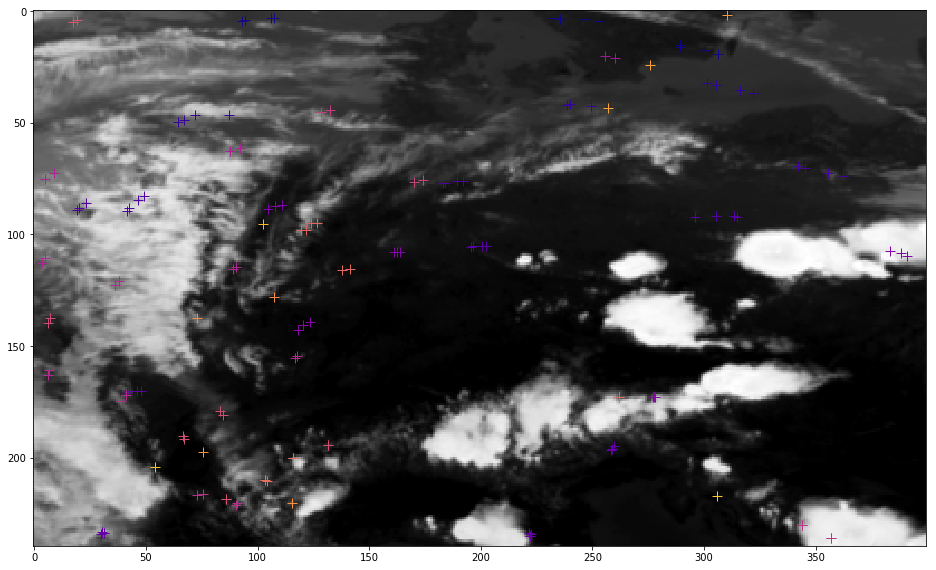

In [48]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
ax.imshow(sat_data[n],vmin=210,vmax=300,cmap='gray_r')

for i,tt in enumerate(times):
    
#for i,oid in enumerate(t_obj.id.values):
    #cent_data = centroids[oid]
    #t0 = sufficient_objects[sufficient_objects.id==oid].t0.values[0]
    #tmax = n - t0

    for ce in centroids[i]:
        for oid in centroids[ce]:
            if len(centroids[ce][oid]) > 0:
                ax.plot(centroids[ce][oid][1],centroids[ce][oid][0],
                    color=cmap(norm(oid)),
                    marker='+',
                    markersize = 10)
            else:
                continue

    for co in contours[i]:
        for oid in co:
            ax.plot(co[oid][:, 1], co[oid][:, 0], 
                    linewidth=1,
                    color=cmap(norm(oid)))

ax.set_title(u"BT(10.8 µm) with centroid trajectories and object contours, {}".format(tt.strftime("%Y-%m-%d %H:%M UTC")))
plt.tight_layout()
plt.savefig("{}/bt108_traj_{}.png".format(save_path,tt.strftime("%Y%m%d_%H%M")))
plt.close("all")

In [47]:
centroids[ce][oid][1]

301.3888888888889